In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
btc_sp_df = pd.read_csv('data/btc_sp.csv')
btc_sp_df

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Close_SP500,Open_SP500,High_SP500,Low_SP500
0,2017-08-07,3212.780029,3397.679932,3180.889893,3378.939941,2480.91,2477.14,2480.95,2475.88
1,2017-08-08,3370.219971,3484.850098,3345.830078,3419.939941,2474.92,2478.35,2490.87,2470.32
2,2017-08-09,3420.399902,3422.760010,3247.669922,3342.469971,2474.02,2465.35,2474.41,2462.08
3,2017-08-10,3341.840088,3453.449951,3319.469971,3381.280029,2438.21,2465.38,2465.38,2437.75
4,2017-08-11,3373.820068,3679.719971,3372.120117,3650.620117,2441.32,2441.04,2448.09,2437.85
...,...,...,...,...,...,...,...,...,...
1253,2022-07-29,23845.212891,24294.787109,23481.173828,23804.632813,4130.29,4087.33,4140.15,4079.22
1254,2022-08-01,23336.718750,23464.787109,22890.796875,23314.199219,4118.63,4112.38,4144.95,4096.02
1255,2022-08-02,23308.433594,23415.041016,22710.083984,22978.117188,4091.19,4104.21,4140.47,4079.81
1256,2022-08-03,22981.302734,23578.650391,22747.835938,22846.507813,4155.17,4107.96,4167.66,4107.96


You decide to choose ninety consecutive days to analyze the percent growth of each asset over the same time period. Your goal is to use this sample to better understand the growth of both assets in general.

In [3]:
# Select a random starting row not including the last 90 rows
initial_row = np.random.choice(range(0, len(btc_sp_df)- 90))

# Select the next 90 rows
sample_df = btc_sp_df.iloc[initial_row:(initial_row + 90)]

# Compute the percent increase in closing price of the SP500
sp500_pct_change = (sample_df.iloc[0]['Close_SP500'] - sample_df.iloc[-1]['Close_SP500']) / sample_df.iloc[0]['Close_SP500']

# Compute the percent increase in closing price of BTC
btc_pct_change = (sample_df.iloc[0]['Close_BTC'] - sample_df.iloc[-1]['Close_BTC']) / sample_df.iloc[0]['Close_BTC']

print('SP500: ', sp500_pct_change, '\n', 'BTC: ', btc_pct_change)

SP500:  -0.08349491451235762 
 BTC:  0.051044857539102234


    Notice how the SP500 and BTC had different percent increases over the 90 day period. However, the exact value you get depends heavily on exactly which 90 days you're looking at. In other words, your point estimate depends on your sample.

You used a single sample of ninety days to make your conclusion. However, what if you had a different ninety days. Would your conclusions be different?

One way to assess this is by taking repeated samples. By repeatedly sampling from your data and computing your point estimate you can see how it changes.

In [4]:
# Write a for loop which repeats the sampling ten times
for i in range(10):
    # Select a random starting row 
    initial_row = np.random.choice(range(btc_sp_df.shape[0] - 90))
    # Select the next 90 rows after the starting row
    sample_df = btc_sp_df.iloc[initial_row:initial_row + 90]
    # Compute the percent change in closing price of BTC and print it
    btc_pct_change = (sample_df.iloc[0]['Close_BTC'] - sample_df.iloc[-1]['Close_BTC']) / sample_df.iloc[0]['Close_BTC']
    print(btc_pct_change)

-1.072317621988336
0.08559150162538527
0.44746009619164107
0.3104624735572092
0.42218296708934766
-0.37642302163140334
-1.7821775754220384
0.43966315562849295
0.4477357774832645
-1.0038910195812933


### Sampling and bias

We saw that inference is directly influenced by the sample chosen. This means that our choice of a sample is fundamental in making principled, repeatable, and valid inference.

The main concern when selecting a sample is bias.
- Bias sample: A group occurs more/less often in sample than in population

***
You saw that a single sample can give an unreliable point estimate. To investigate this you decide to take 100 samples of 90 contiguous days of BTC trading data. For each of these 100 samples you compute the percent change in BTC over that time period. You then want to plot this data as a histogram to understand the sampling distribution.



In [5]:
btc_pct_change_list =[]
# Write a for loop which repeats the sampling 100 times
for i in range(100):
    # Select a random starting row 
    initial_row = np.random.choice(range(btc_sp_df.shape[0] - 90))
    # Select the next 90 rows after the starting row
    sample_df = btc_sp_df.iloc[initial_row:initial_row + 90]
    # Compute the percent change in closing price of BTC and print it
    btc_pct_change = (sample_df.iloc[0]['Close_BTC'] - sample_df.iloc[-1]['Close_BTC']) / sample_df.iloc[0]['Close_BTC']
    btc_pct_change_list.append(btc_pct_change)

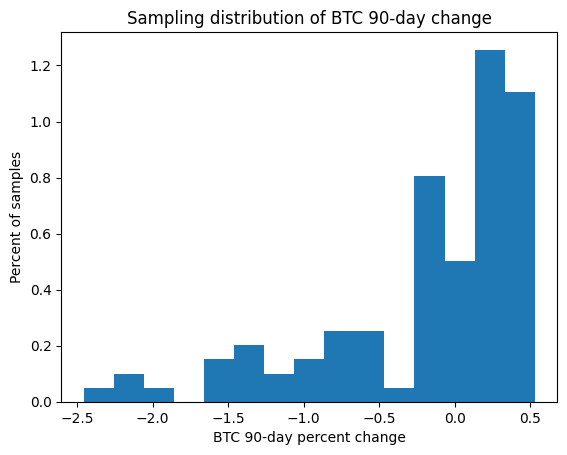

In [6]:
# Plot a histogram of percent changes
plt.hist(btc_pct_change_list, bins=15, density=True)
# Set the x-axis label
plt.xlabel('BTC 90-day percent change')
# Set the y-axis label
plt.ylabel('Percent of samples')
# Set the title
plt.title('Sampling distribution of BTC 90-day change')

plt.show()

    Notice that although a percent change in BTC around zero was the most common, it was far from the only outcome. The long tail to the left indicates that periods with a large drop happen often enough to not just be dismissed as outliers.

### Confidence intervals and sampling

While point estimates are one tool for inference, a single number will never be a perfect estimate of a population statistic.

A confidence interval takes a sample and uses it to generate a range of values, within which we have high confidence that the population statistic we are estimating lies.

Example:
- sample of 100 employees
- mean salary of $80,000
- standard deviation of $ 10,000

we can use this information to generate a confidence interval for the average salary of all employees at the companny

- Valid inference requires a normal sampling distribution.

In [7]:


ci = stats.norm.interval(
    loc = 80000,  # mean
    scale = 10000/np.sqrt(100), # standard error
    confidence = 0.95 # confidence level
)
print(ci)

(78040.03601545995, 81959.96398454005)


#### Central Limit Theorem

In short, the central limit theorem tells us that if we take the average of many independent samples, the resulting sampling distribution will be approximately normal.

In [8]:
population = [0,1,2,3,4,5,6,7,8,9]
sample_means = []
for i in range(10000):
    sample_5 = np.random.choice(population,size=5)
    sample_means.append(sample_5.mean())

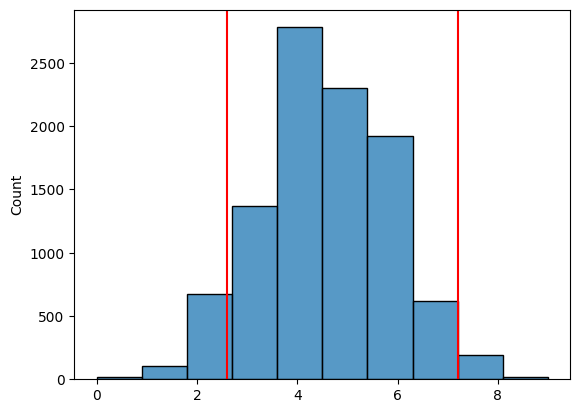

In [9]:
sns.histplot(data =sample_means,bins=10)
plt.axvline(2.6,color = 'red')
plt.axvline(7.2,color = 'red')
plt.show()

Once we graph the sampling distribution we see that it is approximately normal. If we wanted just the middle 95% of this data, we could see that,95% of the time, the mean will lie between 2.6 and 7.2. In other words, 95% of the time the population mean will be in this range.

Finally, our confidence interval comes from the mean and standard error of our sample. Thereforem different samples will yield different confidence intervals, and thus potentially different conclusions.

We cannot say:
- there is a 95% chance the population statistic is in the confidence interval

Instead:
- If we took many samples and constructed a confidence interval each time, then about 95% of the time our population statistic would lie in the confidence interval.
    - Repeated samples -> 95% of confidence intervals contain population statistic

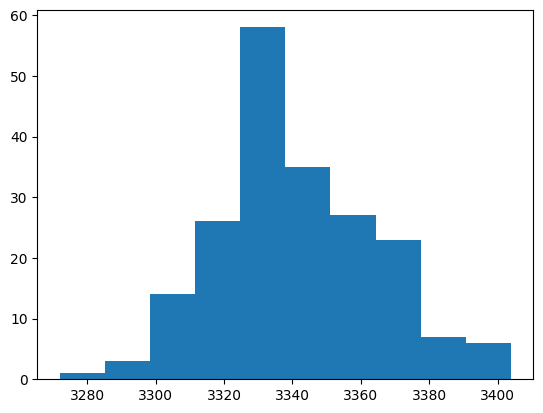

In [10]:
# Define the number of samples to take and store the sample means
num_samples = 200
sample_means = []

# Write a for loop which repeats the sampling num_samples times
for i in range(num_samples):
  # Select 500 random SP500 closing prices 
  sp500_sample = btc_sp_df['Close_SP500'].sample(n=500)
  # Compute mean closing price and save it to sample_means
  sample_means.append(sp500_sample.mean())
    
plt.hist(sample_means,bins=10)
plt.show()

    Notice how the sampling distribution is approximately normal, indicating that a confidence interval is a valid choice for estimating the closing price of the SP500. 

In [11]:
# Select a sample of 500 random days
sample_df = btc_sp_df['Close_SP500'].sample(n=500)

# Calculate the mean of the sample
sample_mean = sample_df.mean()

# Calculate the standard error of the sample
sample_se = sample_df.std() / np.sqrt(sample_df.shape[0])

# Calculate a 95% confidence interval using this data
stats.norm.interval(confidence=0.95,
                   loc=sample_mean,
                   scale=sample_se)

(3260.233508729543, 3382.787051270458)

    Notice how your confidence interval is relatively narrow, since the sample size was large enough to give you a reasonable estimate of the mean.

You've seen how random sampling can be used to choose a sample of data which is (hopefully!) representative of the population you are studying. You've also seen how bias in sampling procedure can result in conclusions that are suspect at best, and completely wrong at worst.

In this exercise you'll analyze the average closing price of the S&P 500. If you take two different samples of trading days and compute confidence intervals for each, should you expect to see the same result? It's time for you to dive in and see!

In [12]:
# Sample 1: Select a random sample of 500 rows
sample_df = btc_sp_df.sample(n=500)

# Compute a 95% confidence interval for the closing price of SP500
sample_ci = stats.norm.interval(confidence=0.95, 
                            loc=sample_df['Close_SP500'].mean(), 
                            scale=sample_df['Close_SP500'].std()/np.sqrt(500)
)
print(sample_ci)

(3292.7692695806118, 3417.4475704193883)


In [13]:
# Sample 2: Select the first 500 rows
first_500_df = btc_sp_df.iloc[:500]

# Compute a 95% confidence interval for the closing price of SP500
first_500_ci = stats.norm.interval(
	confidence=0.95,
	loc=first_500_df['Close_SP500'].mean(), 
	scale=first_500_df['Close_SP500'].std()/np.sqrt(500)
)

print(first_500_ci)

(2719.898053221996, 2744.858786778004)


***Notice that the sample_ci and first_500_ci values in the console are different. How is this possible?***
>While your samples may be randomly chosen, their corresponding mean and standard error are vastly different. This causes us to get completely different confidence intervals! 

### Normality tests

A powerful suite of statistical tools, which includes several common hypothesis tests, depends on the assumption that the underlying data is normally distributed. While a histogram can hint at whether the data is approximately normally distributed, various hypothesis tests allow us to test this assumption directly. Moreover, histograms can be very sensitive to the number of bins, especially when the sample sizes are small.

In [14]:
salary_df = pd.read_csv('data/austin_salaries.csv')
salary_df

,Title,Gender,Ethnicity,Annual Salary,Years of Employment
0,Administrative Specialist,F,White,51542.4,6
1,Administrative Specialist,M,Black or African American,48235.2,11
2,Administrative Specialist,F,Hispanic or Latino,51542.4,14
3,Administrative Specialist,F,Hispanic or Latino,48235.2,3
4,"MuniProg, Paraprofessional",F,White,50668.8,2
...,...,...,...,...,...
3389,Administrative Specialist,F,White,51542.4,34
3390,Administrative Specialist,F,Hispanic or Latino,41579.2,3
3391,Administrative Specialist,F,Hispanic or Latino,51542.4,9
3392,Administrative Specialist,F,White,51542.4,9


In [21]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                3394 non-null   object 
 1   Gender               3394 non-null   object 
 2   Ethnicity            3394 non-null   object 
 3   Annual Salary        3394 non-null   float64
 4   Years of Employment  3394 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.7+ KB


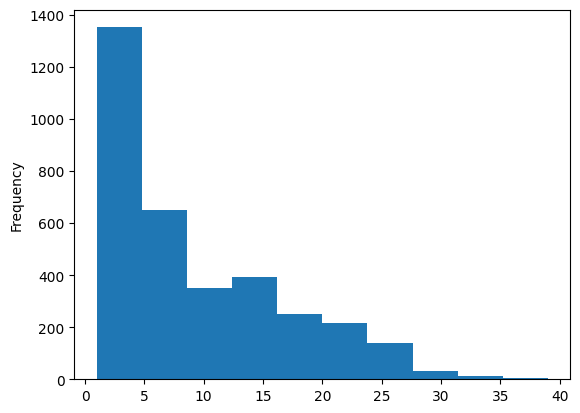

In [15]:
salary_df['Years of Employment'].plot(kind='hist')
plt.show()

In [16]:
# Conduct an Anderson-Darling test using the years of employment
result = stats.anderson(salary_df['Years of Employment'], dist='norm')

# Significance levels where test statistic > critical values
significant_at = result.statistic > result.critical_values

# Print the significance levels
print(result.significance_level[significant_at])

[15.  10.   5.   2.5  1. ]


    Notice how the null hypothesis of normal distribution is rejected at all significance levels. Therefore, you can conclude that the errors are not normally distributed, and there is room for improvement in the model. 

In [22]:
# Fit a normal distribution to the data
mu, std = stats.norm.fit(salary_df['Years of Employment'])

# Compute the percentage of employees with less than 10 years experience
percent = stats.norm.cdf(10, loc=mu, scale=std)

# Print out this percentage
print(percent)

0.5490936192017909


In [25]:
# real probability
len(salary_df.loc[salary_df['Years of Employment']<10])/len(salary_df['Years of Employment'])

0.5981143193871538

### Correlation tests

In [26]:
rent = pd.read_csv('data/median_rent.csv')
rent

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.578,1.578,1.580,1.582,...,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064
2,17426,Chicago,Chicago,Cook,IL,3,1.244,1.248,1.254,1.254,...,1.354,1.362,1.370,1.374,1.378,1.380,1.380,1.380,1.376,1.374
3,39051,Houston,Houston,Harris,TX,4,0.788,0.784,0.784,0.786,...,0.984,0.984,0.982,0.980,0.976,0.974,0.974,0.976,0.976,0.974
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,0.854,0.858,0.858,0.858,...,0.948,0.956,0.962,0.964,0.964,0.966,0.968,0.972,0.974,0.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11914,182023,Henrico,Richmond,Henrico,VA,11915,0.740,0.736,0.734,0.734,...,0.854,0.856,0.856,0.856,0.856,0.858,0.858,0.860,0.862,0.860
11915,397405,Highland Township,Gettysburg,Adams,PA,11916,0.780,0.776,0.778,0.778,...,0.832,0.836,0.826,0.822,0.812,0.810,0.808,0.804,0.788,0.774
11916,398343,Urbana,Corning,Steuben,NY,11917,0.954,0.956,0.970,0.984,...,1.030,1.032,1.038,1.042,1.046,1.048,1.048,1.048,1.042,1.034
11917,398839,Angels,NaN,Calaveras,CA,11918,0.976,0.984,0.988,0.980,...,0.974,0.980,0.984,0.980,0.980,0.982,0.992,1.004,1.014,1.018


In [52]:
dates = rent.columns[6:]
dates = pd.to_datetime(dates)
dates

DatetimeIndex(['2010-11-01', '2010-12-01', '2011-01-01', '2011-02-01',
               '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01',
               '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01',
               '2011-11-01', '2011-12-01', '2012-01-01', '2012-02-01',
               '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
      

In [61]:
lasvegas_rents = rent.loc[rent['City']=='Las Vegas','November 2010':'January 2017'].iloc[0,:].values
lasvegas_rents

array([0.75 , 0.75 , 0.748, 0.748, 0.746, 0.744, 0.742, 0.74 , 0.736,
       0.734, 0.734, 0.732, 0.73 , 0.728, 0.728, 0.724, 0.724, 0.722,
       0.722, 0.722, 0.722, 0.72 , 0.72 , 0.718, 0.72 , 0.72 , 0.72 ,
       0.72 , 0.718, 0.718, 0.718, 0.718, 0.718, 0.718, 0.718, 0.72 ,
       0.722, 0.724, 0.724, 0.724, 0.724, 0.726, 0.726, 0.726, 0.726,
       0.728, 0.73 , 0.732, 0.734, 0.736, 0.736, 0.738, 0.74 , 0.742,
       0.744, 0.748, 0.752, 0.754, 0.756, 0.756, 0.754, 0.754, 0.756,
       0.76 , 0.764, 0.768, 0.77 , 0.772, 0.774, 0.772, 0.774, 0.774,
       0.778, 0.78 , 0.78 ])

In [62]:
houston_rents = rent.loc[rent['City']=='Houston','November 2010':'January 2017'].iloc[0,:].values

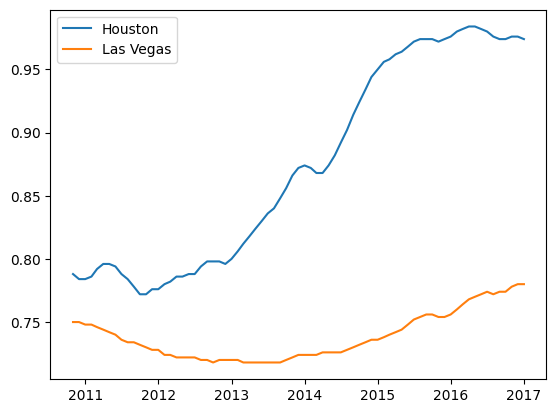

In [63]:
# Create a line graph showing the rents for both San Francisco and Las Vegas
sns.lineplot(x=dates, y=houston_rents, label='Houston')
sns.lineplot(x=dates, y=lasvegas_rents, label='Las Vegas')
plt.show()

    Notice how the graphs seem to suggest some sort of positive correlation, and the strong correlation coefficient and extremely low p-value cement this fact. You can feel confident claiming that there is a strong relationship in rent prices between these two cities.

In [64]:
# Compute the Pearson correlation coefficient R, as well as the p-value
r, p_value = stats.pearsonr(houston_rents, lasvegas_rents)

# Print if the p-value is less than alpha = 5%
print(p_value < 0.05)

# Print out R-squared
print(r**2)

True
0.48216219738821625


#### Autocorrelation

In [73]:
la_rents = rent.loc[rent['City']=='Los Angeles'].values[0][6:]

In [74]:
# Select all but the first twelve rents
la_rents_initial = la_rents[12:]

# Select all but the last twelve rents (12 month lag)
la_rents_lag = la_rents[:-12]

# Compute the correlation between the initial values and the lagged values
r, p_value = stats.pearsonr(la_rents_initial, la_rents_lag)

# Check if the p-value is significant at the 5% level
print(p_value < 0.05)

True


    You may be tempted to perform a t-test to compare mean rent prices in each city. However, as t-test has the assumption of independence, which autocorrelation directly violates. Thus any results from a t-test would be invalid.

>You saw that rent prices between Houston and Las Vegas are correlated. However, to what extent can the price change in one city explain the price change in another city? By computing R-squared you are able to precisely quantify this.

In [77]:
# Compute the correlation between Houston and Las Vegas
r, p_value = stats.pearsonr(houston_rents,lasvegas_rents,)

# Print R-squared
print(r**2)

0.48216219738821625


    R-squared gives us a precise measurement of the percentage of explained variance. Here we see that 48% of the variance of rent prices in Houston can be explained by knowing the rent prices in Las Vegas. An interesting question would be, what explains the remaining 52% of the variation?

### Parametric Test
#### ANOVA
    - Compares mean response in each factor
    - Response: A numerical measured value
    - Factor: A categorical value defining groups 

>For example, suppose we were looking at venture capital funding from different companies in different market segments. We would likely see differences in amounts funded. 
Are these differences just due to random chance, or do they reflect an underlying difference in industries?

In [78]:
invest = pd.read_csv('data/investments_VC.csv')
invest.head()

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity
0,Games,4000000,operating,USA,2,0,4000000,0,0
1,Software,7000000,NaN,USA,1,0,7000000,0,0
2,Advertising,4912393,closed,ARG,1,0,0,0,0
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0
4,Games,41250,operating,HKG,1,41250,0,0,0


In [79]:
invest.groupby('market')['funding_total_usd'].mean()

market
Advertising            1.380661e+07
Analytics              1.476293e+07
Biotechnology          2.083867e+07
Clean Technology       3.525767e+07
Curated Web            7.176645e+06
E-Commerce             1.533770e+07
Education              9.194975e+06
Enterprise Software    1.697202e+07
Finance                2.453714e+07
Games                  9.776524e+06
Hardware + Software    1.289027e+07
Health Care            2.645070e+07
Health and Wellness    1.499574e+07
Manufacturing          1.564739e+07
Mobile                 2.892989e+07
Security               1.514460e+07
Semiconductors         2.614778e+07
Social Media           4.942852e+06
Software               1.042555e+07
Web Hosting            2.714344e+07
Name: funding_total_usd, dtype: float64

Some markets seem to have similar average funding, such as advertising and analytics, while others like biotechnology are quite different. We want to determine if the differences are statistically significant, so we'll conduct an ANOVA test.

- Response: Funding
- Factor: Market
- ANOVA: Compare mean funding by market

#### Assumptions of ANOVA
- Responses for each factor are normally distributed
    - Funding amounts by market are normally distributed
- Responses by factor has equal population variance
    - Funding variation by market are normally distributed

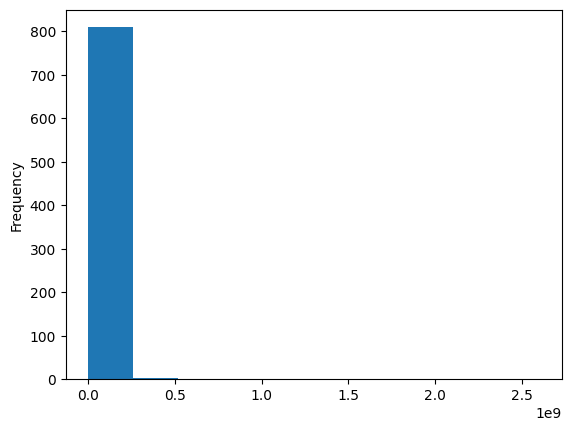

In [82]:
health_df = invest[invest['market']=='Health and Wellness']
health_df['funding_total_usd'].plot(kind='hist')
plt.show()

If we plot the data from the health and wellness market, we see it's definitely not normally distributed, and has a heavy tail. This is because most companies had only small amounts of funding, with a few companies getting signifcantly higher funding.

A common trick when dealing with data of this sort of to take logarithm: ***log-transformation***

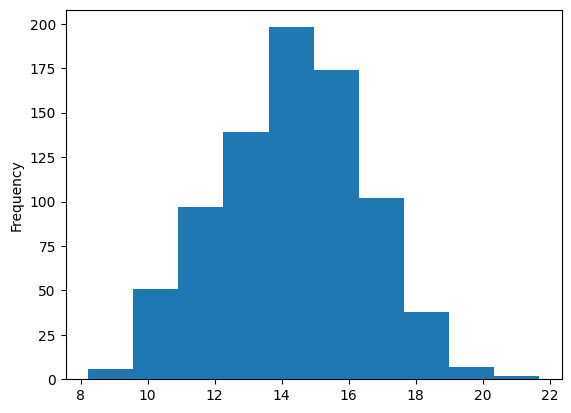

In [84]:
health_log = np.log(health_df['funding_total_usd'])
health_log.plot(kind='hist')
plt.show()

#### Equal variance
One way to do this would be to look at the standard deviation of each industy and see if they're similar. However, just like with anything statistical, there is always the question of 'how close is close enouth'.

To test if the differences in variance we see are statistically significant, we can use a ***Levene*** test of equak variance.

>Levene Test of equal variance:
- H0: populations have equal variance
- HA: populations have different variances

In [85]:
invest['log_funding'] = np.log(invest['funding_total_usd'])
invest.groupby('market')['log_funding'].std()

market
Advertising            2.254390
Analytics              2.152852
Biotechnology          1.946059
Clean Technology       2.282700
Curated Web            2.182070
E-Commerce             2.383981
Education              2.266266
Enterprise Software    2.029004
Finance                2.244723
Games                  2.249092
Hardware + Software    1.999626
Health Care            2.166054
Health and Wellness    2.150630
Manufacturing          2.007318
Mobile                 2.216996
Security               1.958621
Semiconductors         1.589911
Social Media           2.232275
Software               2.075646
Web Hosting            2.043647
Name: log_funding, dtype: float64

In [90]:
analytics_df = invest[invest['market']=='Analytics']
health_df = invest[invest['market']=='Health and Wellness']


In [91]:
s,p_value = stats.levene(health_df['log_funding'],analytics_df['log_funding'])
print(p_value)
print(p_value<0.05)


0.7315297074914971
False


    Since the p-value is not less than 5%, we can conclude that the markets do indeed have equal variance (Failed to reject H0)

#### ANOVA in SciPy

**Inference based on ANOVA**
>H0: All means are the same

>HA: At least one mean is different

In [92]:
s, p_value = stats.f_oneway(health_df['log_funding'],analytics_df['log_funding'])
print(p_value < 0.05)

True


The ANOVA test concludes a difference in funding at the 5% level.

The markets have statistically significant different funding.

In [94]:
invest

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity,log_funding
0,Games,4000000,operating,USA,2,0,4000000,0,0,15.201805
1,Software,7000000,NaN,USA,1,0,7000000,0,0,15.761421
2,Advertising,4912393,closed,ARG,1,0,0,0,0,15.407272
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0,14.508658
4,Games,41250,operating,HKG,1,41250,0,0,0,10.627406
...,...,...,...,...,...,...,...,...,...,...
23675,Biotechnology,2686600,operating,AUT,1,0,2686600,0,0,14.803787
23676,Education,320000,operating,GBR,1,320000,0,0,0,12.676076
23677,Enterprise Software,1587301,operating,CHN,1,0,1587301,0,0,14.277546
23678,Games,9300000,operating,NaN,1,9300000,0,0,0,16.045525


In [101]:
investments_df = invest[invest['market'].isin(['Biotechnology','Enterprise Software','Health Care'])][['market','funding_total_usd']].reset_index(drop=True)
investments_df.head()

,market,funding_total_usd
0,Biotechnology,3000000
1,Enterprise Software,1800000
2,Enterprise Software,1500000
3,Biotechnology,150000
4,Biotechnology,15034750


***
#### Examples:
if you look at a sample of VC investments and see slightly different average investment amounts, is it reasonable to assume this difference is statistically significant? 

This is a perfect situation for ANOVA. However, a key condition for ANOVA is equal variance between all groups of samples. In this exercise you'll test for that using the Levene test of equal variance.

In [102]:
# Select each industry separately
biotech_df = investments_df[investments_df['market']=='Biotechnology']
enterprise_df = investments_df[investments_df['market']=='Enterprise Software']
health_df = investments_df[investments_df['market']=='Health Care']

# Conduct Levene tests for equal variance between all pairs of industries
statistic_1, p_value_1 = stats.levene(biotech_df['funding_total_usd'], enterprise_df['funding_total_usd'])
statistic_2, p_value_2 = stats.levene(biotech_df['funding_total_usd'], health_df['funding_total_usd'])
statistic_3, p_value_3 = stats.levene(enterprise_df['funding_total_usd'], health_df['funding_total_usd'])

# Print the p-value of each test
print(p_value_1)
print(p_value_2)
print(p_value_3)

0.10608810895774416
0.003769504493494368
0.0014358847125619865


    Notice how two of the three industry pairs had very low p-values, so you can feel confident that their variance is equal. One pair (enterprise and biotech) had a larger p-value around 0.1. This indicates that there may be a little larger difference in variation than we would generally like. However, for our purposes this difference is small enough that we can proced with our ANOVA test.

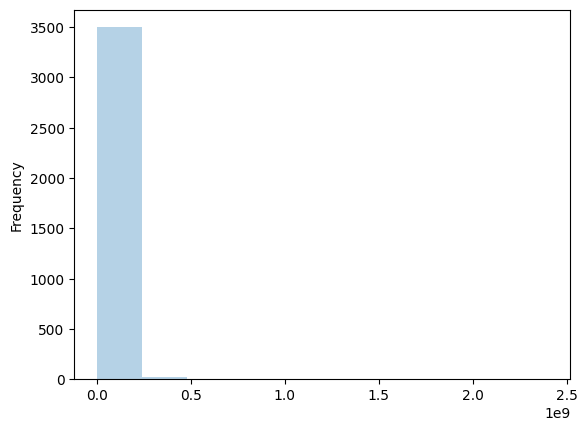

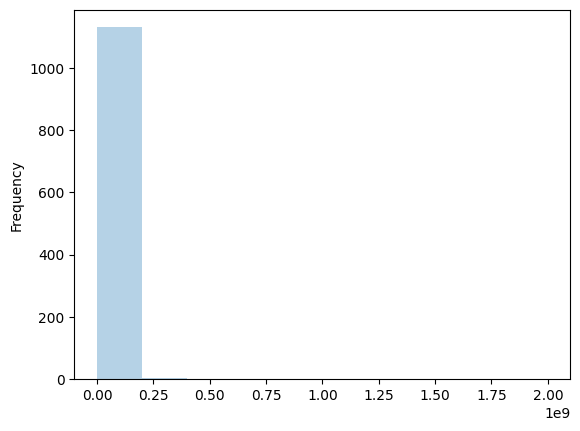

In [103]:
# Plot a histogram of the funding for each industry
biotech_df['funding_total_usd'].plot(kind='hist',alpha=0.33)
plt.show()

enterprise_df['funding_total_usd'].plot(kind='hist',alpha=0.33)
plt.show()



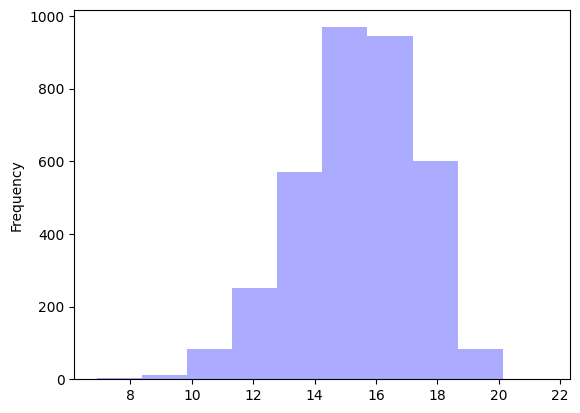

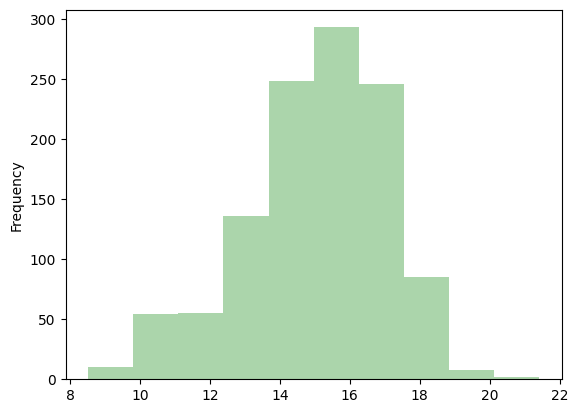

In [104]:
# Plot a histogram of the log funding for each industry

np.log(biotech_df['funding_total_usd']).plot(kind='hist', color='blue', alpha=0.33)
plt.show()


np.log(enterprise_df['funding_total_usd']).plot(kind='hist', color='green', alpha=0.33)
plt.show()

Now that you've established equal variance using a Levene test and assessed visually the approximate normality of the log-transformed salaries, it's time to conduct an ANOVA test! Recall that the purpose of the ANOVA test is to determine if biotech, enterprise software and health care companies had equal average funding. Since these three groups satisfy the conditions of an ANOVA test, you know the conclusions from that test will be valid.

In [105]:
# Log-transform of each market's funding
biotech_log_funding = np.log(biotech_df['funding_total_usd'])
enterprise_log_funding = np.log(enterprise_df['funding_total_usd'])
health_log_funding = np.log(health_df['funding_total_usd'])

# Conduct a one-way ANOVA test to compare the log-funding
s, p_value = stats.f_oneway(biotech_log_funding,enterprise_log_funding,health_log_funding)

# Print if the p-value is significant at 5%
print(p_value < 0.05)

True


    By using a ANOVA test and properly checking all conditions you can be quite sure that the conclusion to reject the null and claim that differences are indeed

p_value
#### Non-parametric test

Non-parametric tests remove the assumption of normality from the data, and thus are often more broadly applicable than parametric tests. However non-parametric tests often have lower power, meaning a lower chance of detecting an effect.

In addition, parametric and non-parametric tests often test different things.

Non-parametric tests are especially applicable in situations where data takes on a ranked order, such as star ratings for restaurants, where the assumption of normality will almost never be satisfied.
***
**Parametric tests**      $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ **Parametric tests** 

Independent sample t-test  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Wilcoxon-Mann-Whitney U test 

ANOVA  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Kruskal-Wallis test  

Paired sample t-test $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Mood's median test

Pearson's R $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Kendall's tau


#### Mood's median test 
- compares the medians from two paired measurements



In [109]:
uni = pd.read_csv('data/university_rankings.csv')
uni.head()

,University,thew_rank,arw_rank,cw_rank,thew_score,arw_score,cw_score
0,Harvard University,1,1,1,96.1,100.0,100.00
1,Stanford University,4,3,3,94.3,73.4,89.50
2,University of Cambridge,6,2,4,91.2,73.6,86.17
3,California Institute of Technology,2,6,5,96.0,67.1,85.21
4,Princeton University,5,8,6,94.2,60.9,82.50


In [112]:
uni_scores = uni[['University','arw_score','thew_score']]
uni_scores.head()

,University,arw_score,thew_score
0,Harvard University,100.0,96.1
1,Stanford University,73.4,94.3
2,University of Cambridge,73.6,91.2
3,California Institute of Technology,67.1,96.0
4,Princeton University,60.9,94.2


Here we can see a small sample of these rankings from two different rankers - the THEW and ARW. However, there's no reason to believe these scores should be normally distributed. After all, they largely work with top universities, so we would expect most rankings to be relatively high.

We would like to compare the median scores for each university.

In [113]:
s, p_value,m,table = stats.median_test(uni_scores['arw_score'],uni_scores['thew_score'])
print(p_value <0.05)

True


p-value < 5%, indicating the two organizations have different median rankings.

- not t-test: t-test assumes normality ( Mood's median test does not)

#### Kendall's tau
When working with ranked ordinal data, Pearson's correlation coefficient would not be the right tool for the job. Pearson's R assumes both sets of data are approximately normally distributed. With rankings, every value occurs only once, so it will never be normal.

Instead we can use Kendall's tau. It takes values between negative one and one, where negative one indicates completely disagreement, and 0 indicates no correlation.

In [114]:
rankings = uni[['University','thew_rank','arw_rank']]
rankings.head()

,University,thew_rank,arw_rank
0,Harvard University,1,1
1,Stanford University,4,3
2,University of Cambridge,6,2
3,California Institute of Technology,2,6
4,Princeton University,5,8


In [115]:
tau,p_value = stats.kendalltau(rankings['thew_rank'],rankings['arw_rank'])
print(tau,p_value<0.05)

0.6512525427983284 True


    The null hypothesis of no correlation is rejected

In [117]:
# Compute Kendall's tau between the THEW and ARW rankings
tau_thew_arw, p_value_thew_arw = stats.kendalltau(uni['thew_rank'],uni['arw_rank'])

# Compute Kendall's tau between the THEW and CW rankings
tau_thew_cw, p_value_thew_cw = stats.kendalltau(uni['thew_rank'],uni['cw_rank'])

# Compute Kendall's tau between the ARW and CW rankings
tau_arw_cw, p_value_arw_cw = stats.kendalltau(uni['arw_rank'],uni['cw_rank'])

In [118]:
print(tau_thew_arw, p_value_thew_arw)
print(tau_thew_cw, p_value_thew_cw)
print(tau_arw_cw, p_value_arw_cw)

0.6512525427983284 3.4570509197908455e-09
0.6623882222760947 1.8240211163900803e-09
0.7196922583826684 6.29019199828259e-11


    Notice how ARW and CW have the largest value of tau, indicating the highest level of agreement. This is also reflected in them having a lower p-value. However, this is a two-tailed test, so if these two had a very high level of _disagreement_, the p-value would also be very low. Thus examining tau itself is important! Also, note that while you may have been tempted to use Pearson's R to measure correlation, since the data was ranked, inference based on Pearson's R likely would have been invalid!

#### Comparing medians
Parametric tests tend to compare means, while non-parametric tests tend to compare medians. This is because if your data is skewed, the mean may not be a good measure of central tendency, and you should work with the median instead.



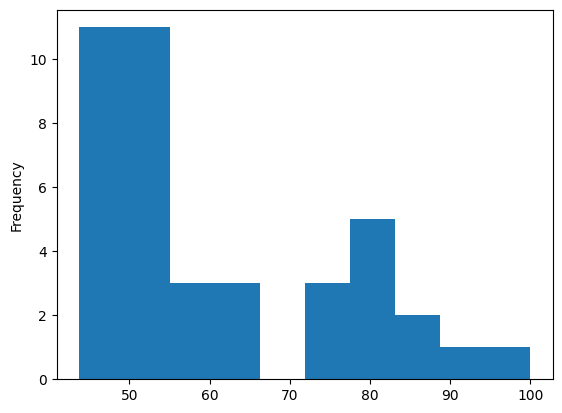

In [121]:
uni['cw_score'].plot(kind='hist')
plt.show()

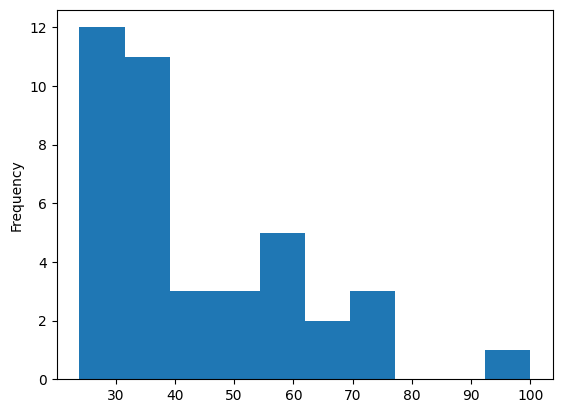

In [123]:
uni['arw_score'].plot(kind='hist')
plt.show()

In [124]:
# Conduct a Mood's median test comparing cw_score and arw_score
s, p_value, med, table = stats.median_test(uni['arw_score'], uni['cw_score'])

# Check if the p-value is significant at 5%
print(p_value <0.05)

True


    Working with medians rather than means can be important if your data is skewed, such as you have here. While the means may or may not be equal, the means may not be representative of the center of your data. So making inference on them may not fully describe your data. In this case the data is most certainly not symmetric, as you saw far more universities with a ranking near 50 and a tail leading out to 100. When you see a skewed distribution, this tells you that the mean is likely not an ideal measure of central tendency

### Effect Size
Measure of the strength of relationship between two variables. For example, it is well known that smoking has a very strong relationship with cancer. Therefore, the effect size between the number of years smoked and the probability of getting cancer is very high. On the other hand, something like a poor diet may also be related to cancer, but with a much smaller strength. While a poor diet may contribute to cancer risk, it has a much, much smaller effect size than smoking.
- smoking: large effect size
- poor diet: small effect size


***
**P-Values**      $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ **Effect size** 

Does a relationship exist?  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ How strong is the relationship? 

Comes from hypothesis test  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Separate from a hypothesis test  

#### Effect size for means - Cohen's d
- n1 = sample size of group one
- n2 = sample size of group two
- s1 = standard deviation of group one
- s2 = standard deviation of group two
- $\bar{x_1}$ = mean of group one
- $\bar{x_2}$ = mean of group two
>$$ pooled ~ standard ~ deviation ~~ s= \sqrt{\frac{(n_{1}-1)s^2_{1}+(n_{2}-1)s^2_{2}}{n_{1}+n_{2}-2}} $$
>$$ Cohen's ~ d ~ = \frac{\bar{x_1}-\bar{x_2}}{s} $$

Interpreting Cohen's d
- 0.01 very small
- 0.2  small
- 0.5  medium
- 0.8  large
- 1.2  very large

In [127]:
r,p_value = stats.pearsonr(btc_sp_df['Close_BTC'],btc_sp_df['Close_SP500'])
print(r**2)

0.8208388528595815


$R^2$: Percent of variation in one variable explained by knowing the other.

Knowing one explains 82% of the variation in the other.

#### Effect size for categorical variables

- $\chi^2$ =  Chi-squared statistic from categorical table
- n = total number of data points
- d = degrees of freedom = min(rows - 1, cols -1)

$$Cramer'sV = \sqrt{\frac{\chi^2/n}{d}}

In [149]:
contingency_table = salary_df[['Title','Gender']].pivot_table(index='Title',columns='Gender',aggfunc='value_counts')
contingency_table

Gender,F,M
Title,,
Administrative Specialist,183,33
Fire Specialist,16,186
Firefighter,49,481
"MuniProg, Paraprofessional",405,494
Police Corporal/Detective,39,337
Police Officer,111,1060


In [150]:
chi2,p,d,e = stats.chi2_contingency(contingency_table)
dof = min(6-1,2-1)
n = len(salary_df)
v = np.sqrt((chi2/n)/dof)
print(v)

0.5233064159759255


***
#### Examples (Effect size for means):
Many venture capital-backed companies receive more than one round of funding. In general, the second round is bigger than the first. Just how much of an effect does the round number have on the average funding amount? You can use Cohen's d to quantify this.

In [155]:
invest.head()

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity,log_funding
0,Games,4000000,operating,USA,2,0,4000000,0,0,15.201805
1,Software,7000000,NaN,USA,1,0,7000000,0,0,15.761421
2,Advertising,4912393,closed,ARG,1,0,0,0,0,15.407272
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0,14.508658
4,Games,41250,operating,HKG,1,41250,0,0,0,10.627406


In [158]:
# Select all investments from rounds 1 and 2 separately
round1_df = invest[invest['funding_rounds'] == 1]
round2_df = invest[invest['funding_rounds'] == 2]

# Calculate the standard deviation of each round and the number of companies in each round
round1_sd = round1_df['funding_total_usd'].std()
round2_sd = round2_df['funding_total_usd'].std()
round1_n = round1_df.shape[0]
round2_n = round2_df.shape[0]

# Calculate the pooled standard deviation between the two rounds
pooled_sd = np.sqrt(((round1_n-1)*round1_sd**2 + (round2_n-1)*round2_sd**2) / (round1_n + round2_n - 2))

# Calculate Cohen's d
d = (round1_df['funding_total_usd'].mean() - round2_df['funding_total_usd'].mean()) / pooled_sd
d

-0.07719192881235956

    If you printed out d in the console you'll see it's only about 0.08. That's a surprisingly low value! That tells us that moving to a second round of funding does not in itself have a large effect on the amount of money raised. This is likely due to how large the standard deviations are, which means that the means are unreliable estimates.

#### Example(Effect size for correlations):
The volatility of an asset is roughly defined by how much its price changes. In this exercise you'll measure volatility on a per-day basis, defined as the high price minus the low price, divided by the closing price.

What factors explain the volatility of Bitcoin? Is the volatility of the S&P500 closely related to this? Does volatility increase or decrease as prices rise? In other words, what is the effect size of the correlation between these different factors? You'll compute both of these effect size in this exercise.



In [160]:
btc_sp_df.head()

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Close_SP500,Open_SP500,High_SP500,Low_SP500
0,2017-08-07,3212.780029,3397.679932,3180.889893,3378.939941,2480.91,2477.14,2480.95,2475.88
1,2017-08-08,3370.219971,3484.850098,3345.830078,3419.939941,2474.92,2478.35,2490.87,2470.32
2,2017-08-09,3420.399902,3422.760010,3247.669922,3342.469971,2474.02,2465.35,2474.41,2462.08
3,2017-08-10,3341.840088,3453.449951,3319.469971,3381.280029,2438.21,2465.38,2465.38,2437.75
4,2017-08-11,3373.820068,3679.719971,3372.120117,3650.620117,2441.32,2441.04,2448.09,2437.85


In [161]:
# Compute the volatility of Bitcoin
btc_sp_df['Volatility_BTC'] = (btc_sp_df['High_BTC']-btc_sp_df['Low_BTC'])/btc_sp_df['Close_BTC']

# Compute the volatility of the S&P500
btc_sp_df['Volatility_SP500'] = (btc_sp_df['High_SP500']-btc_sp_df['Low_SP500'])/btc_sp_df['Close_SP500']

# Compute and print R^2 between the volatility of BTC and SP500
r_volatility, p_value_volatility = stats.pearsonr(btc_sp_df['Volatility_BTC'],btc_sp_df['Volatility_SP500'])
print('R^2 between volatility of the assets:', r_volatility**2)

# Compute and print R^2 between the volatility of BTC and the closing price of BTC
r_closing, p_value_closing = stats.pearsonr(btc_sp_df['Volatility_BTC'],btc_sp_df['Close_BTC'])
print('R^2 between closing price and volatility of BTC:', r_closing**2)

R^2 between volatility of the assets: 0.03152987723111428
R^2 between closing price and volatility of BTC: 0.012520659135177178


    Neither the volatility of the S&P 500 nor the closing price of BTC has a large correlation with the volatility of BTC. However, you still learn something from the correlations! 

    You can see that the volatility of the S&P 500 explains about 3% of the variation of volatility of BTC, while the closing price of BTC explains about 1%. Therefore, price swings in BTC aren't simply related to price swings in the S&P 500, nor in the price of BTC being especially high/low. 



#### Example(Effect size for categorical variables)
You saw in the City of Austin employee data that job titles have an unequal distribution of genders.

But does the same thing hold for ethnicities?
 
And to what extent does ethnicity relate to the job title chosen?

In [165]:
employees_df = salary_df[['Title','Ethnicity']].pivot_table(index='Title',columns='Ethnicity',aggfunc='value_counts')
employees_df

Ethnicity,Asian,Black or African American,Hispanic or Latino,White
Title,,,,
Administrative Specialist,5,34,99,78
Fire Specialist,8,9,36,149
Firefighter,5,37,127,361
"MuniProg, Paraprofessional",37,142,227,493
Police Corporal/Detective,5,31,77,263
Police Officer,34,86,263,788


In [171]:
# Compute the chi-squared statistic
chi2, p, d, expected = stats.chi2_contingency(employees_df)

# Compute the DOF using the number of rows and columns
dof = min(len(employees_df.index) - 1, len(employees_df.columns) - 1)

# Compute the total number of people
n = np.sum(employees_df.values)

# Compute Cramer's V
v = np.sqrt((chi2 / n) / dof)

print("Cramer's V:", v, "\nDegrees of freedom:", dof)

Cramer's V: 0.12902342923732754 
Degrees of freedom: 3


#### Interpreting Cramer's V

**Degrees of freedom** $~~~~~~~~~~~~$ **Small** $~~~~~~~~~~~~$ **Medium** $~~~~~~~~~~~~$ **Large**

$~~~~~~~~~~~~~~$ 1  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 0.10 $~~~~~~~~~~~~~~~~$ 0.30 $~~~~~~~~~~~~~~~~~$ 0.50

$~~~~~~~~~~~~~~$ 2  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 0.07 $~~~~~~~~~~~~~~~~$ 0.21 $~~~~~~~~~~~~~~~~~$ 0.35

$~~~~~~~~~~~~~~$ 3  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 0.06 $~~~~~~~~~~~~~~~~$ 0.17 $~~~~~~~~~~~~~~~~~$ 0.29

$~~~~~~~~~~~~~~$ 4  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 0.05 $~~~~~~~~~~~~~~~~$ 0.15 $~~~~~~~~~~~~~~~~~$ 0.25

$~~~~~~~~~~~~~~$ 5  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 0.04 $~~~~~~~~~~~~~~~~$ 0.13 $~~~~~~~~~~~~~~~~~$ 0.22

    While a chi-squared test can test for association between two categorical variables, it doesn't directly answer the question of the degree of association. By computing an effect size like Cramer's V, you can directly measure the effect that one variable has on the other.

    Here you see that job title and ethnicity are certainly related, but not directly linked. This might lead you to search for what other factors are influencing the job a person gets.

### Muliple comparisons and Corrections
Often, when conduct several inferences or tests simultaneously, the probability of detecting an effect that is not in fact present increases.

Suppose we wanted to see if people liked a new product our company was developing. We start by asking one person and they say no. We then ask another person and they also say no. We repeat this until eventually one person says yes. We then go back to our boss and say 'People like our product!' Clesrly this is silly, as we're taking samples until we get the result we want. But this is precisely the multiple comparisons problem.

Imagine that we were trying to determine what factors increased sales, and we sent a survey to cusyomers with 50 questions, we might take the response to each question one-by-one and see if it seems to correlate with, or help explain, the choice of customer to buy or not buy our product. We may also look at pairs of variables, or maybe even more.

**Multiple Comparisons Problem**: Making comparisons until getting the result we want.

**The role of alpha in inference**
- p-value: probability of a result occuring at random. If a highly unlikely result occurs, it raises our suspicion, and makes us consider if something in our experiment caused that result. Such as a very high number of people getting better after taking our treatment, which causes us to suspect that our treatment is what did it.
- $\alpha$: strength of result needed for significance. Alpha is the cutoff for how strong this evidence needs to be before we reject the null. But when we make many comparisons, we increase the probability of finding results which demonstrate a strong relationship, even if it's only due to random chance.
- p-value < $\alpha$: conclude a relationship exists.

**Correcting for multiple comparisons**
- starting $\alpha$ = 0.05
- number of comparisons = 50
- Bonferonni-corrected $\alpha$ = $\frac{0.05}{50}$ = 0.001
- Conduct hypothesis tests with $\alpha$ = 0.001
- It reduced probability of detecting a significant result by chance.


#### Example(Multiple comparison problem)
The multiple comparisons problem arises when a researcher repeatedly checks different variables/samples against one another for significance. Just by random chance we expect to find an occasional result of statistical significance.

In this exercise you'll work with data from salaries for employees at the City of Austin, TX. You will compare their salaries against randomly generated data. You will see how often this random data is "significant" in explaining the salaries of employees. Clearly any such "significance" would be spurious, as random numbers aren't very helpful in explaining anything!

In [174]:
police_salaries_df = salary_df[salary_df['Title']=='Police Officer']
police_salaries_df

,Title,Gender,Ethnicity,Annual Salary,Years of Employment
1734,Police Officer,M,White,72681.44,6
1735,Police Officer,M,White,83210.40,15
1736,Police Officer,M,White,83210.40,13
1737,Police Officer,M,White,72681.44,5
1738,Police Officer,M,Hispanic or Latino,95270.24,20
...,...,...,...,...,...
3327,Police Officer,M,White,77767.04,11
3328,Police Officer,M,White,83210.40,12
3329,Police Officer,M,White,58680.96,2
3330,Police Officer,M,White,72681.44,5


In [181]:
# Compute number of rows and initialize n_significant
n_rows = police_salaries_df.shape[0]
n_significant = 0
p_values = []

# For loop which generates n_rows random numbers 1000 times
for i in range(1000):
  random_nums = np.random.uniform(size=n_rows)
  # Compute correlation between random_nums and police salaries
  r, p_value = stats.pearsonr(police_salaries_df['Annual Salary'], random_nums)
  p_values.append(p_value)
  # If the p-value is significant at 5%, increment n_significant
  if p_value < 0.05:
    n_significant += 1
    
print(n_significant)

52


    Notice how about 50 out of 1000, or 5%, of the results were significant. This is not a coincidence! Your cutoff for significance was 5%, meaning about 5% of the time a random correlation will cross this threshold. This clearly demonstrates the problem with repeatedly running experiments and assuming that low p-values indicate something meaningful.

#### EXample(Bonferonni-Holm correction)
You've seen that comparing many different datasets, even randomly generated ones, can result in "statistically significant relationships" that are anything but! One way around this is to apply a correction to the alpha of your confidence level.

In [202]:
# Compute the Bonferonni-corrected alpha
bonf_alpha = 0.05/1000

# Check how many p-values were significant at this level
sum = 0
for i in p_values:
    if i < bonf_alpha:
        sum = sum + 1
print(sum)

0


    What a drastic change from the last exercise! Previously you had quite a few spurious correlations being detected. Now you likely had none, or very close! This means that the bar for what is significant has been raised drastically. This helps reduce the chance of spurious correlations being marked at significant.

    When you used the uncorrected alpha, about 50 of the 1000 experiments (or 5% of them) were "significant". When using the Bonferonni-Holm correction, none (or close to none) of them were significant. 

    it's important to know exactly when to apply them. By understanding that the role of the Bonferonni correction is to minimize the chance of spurious correlations being deemed statistically significant, you know exactly when and where to use it!

### Power of test
Probability of correctly detecting an effect, if indeed an effect is present.

We'd like experiments to have: Large sample sizes, a treatment with a big impact, and a reasonable significance level(neither too big nor too small). Together, these three factors will inflence the outcome of an experiment.

Imagine a weight loss study where the treatment group participates in exercise, and the control group does nothing. We then measure the weight loss for each group.

from scipy.stats import norm

Control group: Mean 0 pounds, std 1 pound (no weight loss on average, with a standard deviation of 1 pound)

>control = norm.rvs(loc=0, scale=1, size=100)

Treatment group: Mean -2 pounds, std 1 pound

>treatment = norm.rvs(loc=-2, scale=1, size=100)

**Simulations**(small sample size)

>$H_{0}$: No difference in weight loss 
<br>
>$H_{A}$: Treatment group loses weight

In [227]:
control = stats.norm.rvs(loc=0, scale=1, size=100)
treatment = stats.norm.rvs(loc=-2, scale=1, size=100)

alpha = 0.05
t_test = stats.ttest_ind(treatment,control,alternative='less') #less:the mean of the distribution underlying the first sample is less than that of the second sample
print('{}'.format('reject the Null Hypothesis' if t_test.pvalue < alpha else 'fail to reject Null Hypothesis'))

reject the Null Hypothesis


What if instead of 100 people, we had just five people in each group?

In [235]:
control = stats.norm.rvs(loc=0, scale=1, size=5)
treatment = stats.norm.rvs(loc=-2, scale=1, size=5)

alpha = 0.05
tt = stats.ttest_ind(treatment,control,alternative='less') 
print('{}'.format('reject the Null Hypothesis' if tt.pvalue < alpha else 'fail to reject Null Hypothesis'))

fail to reject Null Hypothesis


**Simulations**(small effect size)

In [238]:
control = stats.norm.rvs(loc=0, scale=1, size=100)
treatment = stats.norm.rvs(loc=-0.2, scale=1, size=100)

alpha = 0.05
t_test = stats.ttest_ind(treatment,control,alternative='less') #less:the mean of the distribution underlying the first sample is less than that of the second sample
print('{}'.format('reject the Null Hypothesis' if t_test.pvalue < alpha else 'fail to reject Null Hypothesis'))

fail to reject Null Hypothesis


In [239]:
control = stats.norm.rvs(loc=0, scale=1, size=1000)
treatment = stats.norm.rvs(loc=-0.2, scale=1, size=1000)

alpha = 0.05
t_test = stats.ttest_ind(treatment,control,alternative='less') #less:the mean of the distribution underlying the first sample is less than that of the second sample
print('{}'.format('reject the Null Hypothesis' if t_test.pvalue < alpha else 'fail to reject Null Hypothesis'))

reject the Null Hypothesis


Again, our test comes to the incorrect conclusion of no difference!

**Small effect,Big sample**

The problem is that our effect size is too small for our sample size and significance level.

>By incease the sample size we can combat the effect size.

#### Defining the power of a test
**If there is a significant effect, will our test be able to detect it?**
>Power of a test: if the alternative hypothesis is true, how likely is our test to reject the Null in favor of the alternative?

When designing an experiment, it's best to calculate power before collecting a sample.

In [257]:
from statsmodels.stats import power
# Power function
tt_power = power.TTestIndPower()

# Calculate power
pwr = tt_power.power(effect_size=0.2, # 0.2 pounds weight loss
                    nobs1 = 100, # 100 people in each group
                    alpha = 0.05)
print(pwr)
print(f'The probability that our test detects this difference and rejects the null is only {round(pwr*100,2)}%,\
 low chance of detection!')

0.290645871104774
The probability that our test detects this difference and rejects the null is only 29.06%, low chance of detection!


    Power is important when making inference, because it helps us determine just how likely we are to detect a significant effect, if one exists.

We can also solve for any one missing parameter using the ***solve_power*** function.

Here we mark the sample size nobs1 as **None** to indicate we want to solve for it.

In [258]:
nobs1 = power.TTestIndPower().solve_power(
                                            effect_size = - 0.2,
                                            nobs1 = None, # solve for
                                            alpha = 0.05,
                                            power = 0.8
)
nobs1
print(f'We need at least {round(nobs1,0)} people in each group to achieve a power of 80%')

We need at least 393.0 people in each group to achieve a power of 80%


Power for experimental design
Imagine that you collecedt a sample of 100 people for your study and spend time and money executing it. After your study was done, you realized that the power of your test was only 10%. In other words, even if there was a difference between your groups, there is only a 10% chance your test would detect it, given the data you supplied. What a waste of effort!

Therefore, the best practice is to estimate power before collecting data and running an experiment. 

1. Start by determining a desired power
2. Research effect sizes seen in similar situations, or estimate a realistic effect size.
3. Estimate the sample size needed to achieve the desired power at a given confidence level and effect size using the statsmodel function power()
4. Collect a sample of data using the parameters determined in power analysis.
5. Conduct the desired hypothesis test to test for significance.

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity,log_funding
0,Games,4000000,operating,USA,2,0,4000000,0,0,15.201805
1,Software,7000000,NaN,USA,1,0,7000000,0,0,15.761421
2,Advertising,4912393,closed,ARG,1,0,0,0,0,15.407272
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0,14.508658
4,Games,41250,operating,HKG,1,41250,0,0,0,10.627406
...,...,...,...,...,...,...,...,...,...,...
23675,Biotechnology,2686600,operating,AUT,1,0,2686600,0,0,14.803787
23676,Education,320000,operating,GBR,1,320000,0,0,0,12.676076
23677,Enterprise Software,1587301,operating,CHN,1,0,1587301,0,0,14.277546
23678,Games,9300000,operating,NaN,1,9300000,0,0,0,16.045525


**computing the power of a two sample t-test**

You want to compare average funding per investment round for games companies versus advertising companies. 

In [273]:
ads_acquired_avg_funding = invest[invest['market']=='Advertising']['funding_total_usd']
games_acquired_avg_funding = invest[invest['market']=='Games']['funding_total_usd']

# Compute the ratio of games to advertising companies
games_ads_ratio = len(games_acquired_avg_funding) / len(ads_acquired_avg_funding)

# Cohen's d (standardized effect size) for advertising versus games company's
ads_games_cohensd = 0.03380764912794999

# Compute the power of the test
power.TTestIndPower().power(effect_size=ads_games_cohensd, 
            nobs1=len(ads_acquired_avg_funding),
            alpha=0.05,
            ratio=games_ads_ratio)

0.11314383002768333

In [270]:
# Solve for the sample size needed to achieve a power of 80%
nobs1 = power.TTestIndPower().solve_power(effect_size=ads_games_cohensd, 
                      nobs1= None,
                      alpha=0.05,
                      
                      power = 0.8)

# Print the number of participants needed in one group
print(nobs1)

13735.264811811767


### Bootstrapping
- Bootstrapping = sampling with replacement
    1. Randomly choose a sample
    2. Write it down
    3. Put it back in the data (replacement)
    4. Repeat
- Boostrapped sample = Sample generated from boostrapping

#### Non-parametric confidence interval
For the purposes of inference, our primary interest in bootstrapping is creating booststrapped confidence intervals, which is a non-parametric analogue of the confidence intervals that assume normality.
- Non-parametric analogue of stats.norm.interval
    - Sample with replacement
    - Compute test statistic
- Creates an empirical distribution

In [276]:
salary_df['Years of Employment'].head()

0     6
1    11
2    14
3     3
4     2
Name: Years of Employment, dtype: int64

Suppose we put employees into groups of ten. How much would the experience levels vary within these groups? Would we expect most employees to be around the same experience, or would it be reasonable to expect drastic swings in experience level?

We'll measure this by randomly selecting ten employees and finding the difference between the most and least experienced employees by looking at their years of employment

In [277]:
sample_1 = salary_df['Years of Employment'].sample(n=10)
print(max(sample_1)-min(sample_1))

16


In this one example we saw a spread of 16 years. We could repeat this many times and form a sampling distribution. By then taking the middle 95% of outcomes, we could form a bootstrapped 95% confidence interval.

In [288]:
# Statistic function
def max_min(x):
    return max(x)-min(x)

# Data as a tuple
data = (salary_df['Years of Employment'],)

bootstrap_ci = stats.bootstrap(data,statistic = max_min,vectorized=False,n_resamples=1000)

print(bootstrap_ci)

BootstrapResult(confidence_interval=ConfidenceInterval(low=33.0, high=38.0), standard_error=1.3957120089803672)


***
**Normal confidence intervals**      $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ **Bootstrap confidence intervals** 
***

Requires data to be normally distributed  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Allows for any distribution 

Computed based only on mean and standard error  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Computed directlu from data by resampling  

Inference valid only for normal data  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Inference valid for any data 

Very fast to compute  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Much slower to compute



#### **Use cases for bootstrapping**
- When working with non-normal data
    - ranked data
    - skewed data
- When normal confidence intervals returns questionable values
- Work with any statistic we like

#### Example(Bootstrap confidence intervals)
You previously saw that there is some degree of correlation between the S&P 500 and Bitcoin. One way to measure this would be to look at the correlation coefficient Pearson's R between the two. However, doing so results in only a point estimate. Presumably, at some points in time the correlation between the two is quite close, while at other times they behave very differently. How can you characterize the variability? One approach is to create a bootstrap confidence interval for the correlation coefficient between the two. 

In [290]:
# Compute the daily percent change of each asset
btc_sp_df['Pct_Daily_Change_BTC'] = (btc_sp_df['Open_BTC'] - btc_sp_df['Close_BTC']) / btc_sp_df['Open_BTC']
btc_sp_df['Pct_Daily_Change_SP500'] = (btc_sp_df['Open_SP500'] - btc_sp_df['Close_SP500']) / btc_sp_df['Open_SP500']

# Write a function which returns the correlation coefficient
def pearson_r(x, y):
    return stats.pearsonr(x, y)[0]
  
# Compute a bootstrap confidence interval
ci = stats.bootstrap((btc_sp_df['Pct_Daily_Change_BTC'], btc_sp_df['Pct_Daily_Change_SP500']), 
                     statistic=pearson_r, 
                     vectorized=False, paired=True, n_resamples=1000, random_state=1)

print(ci.confidence_interval)

ConfidenceInterval(low=0.17970541935949022, high=0.3439271426526015)



    95% of the time, the correlation between the daily change in the two assets is between about 18% and 34%.

You've seen the results of a bootstrap confidence interval for Pearson's R. But what about common situations like making a confidence interval for a mean? Why would you use a bootstrap confidence interval over a "normal" confidence interval coming from stats.norm?

In [293]:
# Select just the companies in the Analytics market
analytics_df = invest[invest['market'] == 'Analytics']

# Construct a 95% confidence interval for the mean private equity funding using the confidence interval function
norm_ci = stats.norm.interval(confidence=0.95,
                             loc=analytics_df['private_equity'].mean(),
                             scale=analytics_df['private_equity'].std() / np.sqrt(analytics_df.shape[0]))

# Construct a bootstrapped confidence interval
bootstrap_ci = stats.bootstrap(data=(analytics_df['private_equity'], ),
                              statistic=np.mean)

print('Normal CI:', norm_ci)
print('Bootstrap CI:', bootstrap_ci.confidence_interval)

Normal CI: (-695062.1822300977, 4049988.4410101348)
Bootstrap CI: ConfidenceInterval(low=346677.20573773247, high=7516727.078923329)


    These two return quite different results, even though they're estimating the same thing! The primary reason for the difference is that the mean is relatively small and spread out, so the standard error is large. That causes the normal confidence interval to contain negative values.

    Since the average private equity funding cannot be negative, conclusions from this confidence interval are questionable.

    A bootstrap confidence interval is created by sampling from the original data, which does not contain negative values.

    The bootstrap confidence interval is also quite broad, spanning roughly six million dollars! However, this reflects the fact that the private equity funding is highly variable, with one company receiving over six hundred million dollars! And yet, the bootstrap confidence interval avoided negative values and only returned plausible values.



### Combining evidence from p-value

#### Testing p-values
- Fisher's method
    - Different samples/studies
    - Same null hypothesis
    - Different p-values
    - At least one should reject the null
- Combines evidence from multiple studies
- Studies all testing the same null hypothesis


In [304]:
p_values = [0.052,0.12,0.09,0.051]
fishers_stat,p_value = stats.combine_pvalues(p_values)
print(p_value < 0.05)

True


    While no test individually showed statistical significance, the combination of evidence from all of the tests suggest there is indeed a significant effect present.
    Based on the p-value in the console, out of all four studies at least one of them should have rejected the null hypothesis.

In [305]:
p_values = [0.01,0.51,0.81,0.49]
fishers_stat,p_value = stats.combine_pvalues(p_values)
print(p_value < 0.05)

False


    Contrast that with the case where one study had a low p-value of 0.01, and yet all others had significantly larger p-values. In this case, Fisher's method suggests that none of the studies should have rejected the null, and perhaps the one study which did is merely a fluke.

#### Example
>Consider an example where you are testing the effectiveness of a certain diet on weight loss. This diet has been studied by multiple researchers in different settings, but all are testing the null hypothesis that the diet does not induce weight loss. All researchers report their p-values, and you use them in Fisher's method. Why would it make sense to reject some, but not necessarily all, of the null hypotheses?

The samples were different for each researcher, and the diet might have worked better for certain samples than others. Another way to say this is that there may have been different effect sizes for each sample. This is a natural part of experimentation, and may yield slightly different results for each group. So while one group may have responded very well to the treatment, another group, through no fault of the researcher, may not have.

### Permutation tests
- shuffles samples
- observes outcome
- observed difference looks like a random outcome?

In [307]:
new_satisfaction = [94,85,79,91,82]
old_satisfaction = [90,87,77,85,82]

# Group together our data
data = (new_satisfaction,old_satisfaction)

# Define our test statistic
def statistic(x,y):
    return np.mean(x) - np.mean(y)

# Compute a permutation test for the difference in means
result = stats.permutation_test(data,
                       statistic=statistic,
                       n_resamples=1000,# how many times the data should be shuffled to build the null distribution, meaning the distribution of outcomes that occur purely by chance
                       vectorized=False,
                       alternative='greater')
print(result.pvalue<0.05)

False


    The p-value returned from this test is not significant at 5% level, meaning the new_satisfaction greater than old satisfaction could just be due to random chance.

***
**Permutation Tests**      $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ **Bootstrapping** 
***

Build a null distribution by randomly shuffling data  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Build a probability distribution by randomly sampling data

Tests for significance of an outcome  $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Creates a confidence interval showing most likely outcomes 

e.g.

Bootstrap CI :
- You want to understand how much the mean difference between two variables can vary
- You want to estimate a reasonable range of values for the mean difference between two variables

Permutation test:
- You want to understand if the mean difference between two values is likely to differ(be non-zero)
- You want to determine if an observed value of a mean difference between two variables is unusually large.


#### Example(Permutation tests for correlations)

How does the volatility of Bitcoin compare to the volatility of the S&P 500?

You previously computed volatility as the percent daily change, which has been stored for you in the Pct_Daily_Change_BTC and Pct_Daily_Change_SP500 columns in your data. The question you want to answer is the extent to which these two values correlate. One way to answer this is through a permutation test. By randomly shuffling values between the S&P 500 and BTC you are able to see what a random outcome would like like, and then compare this to the observed values.

>Conduct a permutation test with this data, statistic, 1000 resamples, and with an alternative hypothesis of greater volatility with Bitcoin.

In [312]:
btc_sp_df['Pct_Daily_Change_BTC'] = (btc_sp_df['Open_BTC'] -  btc_sp_df['Close_BTC'])/btc_sp_df['Open_BTC']
btc_sp_df['Pct_Daily_Change_SP500'] = (btc_sp_df['Open_SP500'] -  btc_sp_df['Close_SP500'])/btc_sp_df['Open_SP500']
btc_sp_df.head()

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Close_SP500,Open_SP500,High_SP500,Low_SP500,Volatility_BTC,Volatility_SP500,Pct_Daily_Change_BTC,Pct_Daily_Change_SP500
0,2017-08-07,3212.780029,3397.679932,3180.889893,3378.939941,2480.91,2477.14,2480.95,2475.88,0.064159,0.002044,-0.051718,-0.001522
1,2017-08-08,3370.219971,3484.850098,3345.830078,3419.939941,2474.92,2478.35,2490.87,2470.32,0.040650,0.008303,-0.014753,0.001384
2,2017-08-09,3420.399902,3422.760010,3247.669922,3342.469971,2474.02,2465.35,2474.41,2462.08,0.052383,0.004984,0.022784,-0.003517
3,2017-08-10,3341.840088,3453.449951,3319.469971,3381.280029,2438.21,2465.38,2465.38,2437.75,0.039624,0.011332,-0.011802,0.011021
4,2017-08-11,3373.820068,3679.719971,3372.120117,3650.620117,2441.32,2441.04,2448.09,2437.85,0.084260,0.004194,-0.082044,-0.000115


In [313]:
# Define a function which returns the Pearson R value
def statistic(x, y):
	return stats.pearsonr(x,y)[0]

# Define the data as the percent daily change from each asset
data = (btc_sp_df['Pct_Daily_Change_BTC'],btc_sp_df['Pct_Daily_Change_SP500'])

# Compute a permutation test for the percent daily change of each asset
res = stats.permutation_test(data, statistic, 
           n_resamples=1000,
           vectorized=False, 
           alternative='greater')

# Print if the p-value is significant at 5%
print(res.pvalue < 0.05)

True


    We put absolutely no assumptions on your data, and yet you were still able to conclude that the observed greater volatility in Bitcoin over SP500 is indeed statistically significant.

#### Example(Analyzing skewed data with a permutation test)
You're interested in comparing the average number of funding rounds between between companies in the analytics space and all other venture-funded companies. While you may be tempted to use a t-test, you can be sure that the number of funding rounds is not normally distributed. Instead, the majority of companies have only one round, with the number of companies with two or more rounds quickly dropping off.

In [317]:
analytics_df = invest.loc[invest['market']=='Analytics']
non_analytics_df = invest.loc[~(invest['market']=='Analytics')]

In [320]:
# Write a "statistic" function which calculates the difference in means
def statistic(funding_group_1, funding_group_2):
  return np.mean(funding_group_1) - np.mean(funding_group_2)

# Conduct a permutation test using 100 resamples
perm_result = stats.permutation_test((analytics_df['funding_rounds'], non_analytics_df['funding_rounds']),
                                    statistic=statistic,
                                    n_resamples=100,
                                    vectorized=False)

# Print the p-value
print(perm_result.pvalue)

0.019801980198019802
